# Operaciones Básicas
OpenCV usa arrays de Numpy para manipular imágenes en memoria. Los arrays de numpy son estructuras optimizadas para operaciones con arreglos multidimensionales similar a lo que se tiene en el entorno de Matlab.


## Acceder y modificar pixeles

In [1]:
import numpy as np
import cv2

# para cargar una imagen en memoria se usa la funcion imread()
img = cv2.imread("lenna.png")
print(type(img))
print(img.dtype)
print(img.shape)

<class 'numpy.ndarray'>
uint8
(512, 512, 3)


Para acceder al valor de un pixel se usa la posicion en cada dimension `img[fila, col]`

In [2]:
img[100, 100]

array([ 78,  68, 178], dtype=uint8)

OpenCV usa por defecto una representación BGR, para ver el canal azul, podemos acceder al primer elemento del pixel.

In [3]:
img[100, 100, 0]

78

Para modificar el valor del pixel simplemente se puede asignar un nuevo valor:

In [4]:
img[100, 100] = [255, 255, 255]

In [5]:
img[100,100]

array([255, 255, 255], dtype=uint8)

In [13]:
img[97:103, 97:103, 2]


array([[177, 172, 172, 173, 176, 177],
       [175, 178, 178, 182, 180, 179],
       [178, 175, 177, 177, 177, 180],
       [179, 171, 179, 255, 178, 174],
       [173, 174, 179, 170, 171, 175],
       [174, 184, 173, 172, 171, 176]], dtype=uint8)

## Visualizar una imagen en un notebook de jupyter
Para visualizar una imagen de OpenCV en un notebook de jupyter debemos usar la librería `matplotlib`

Matplotlib is building the font cache; this may take a moment.


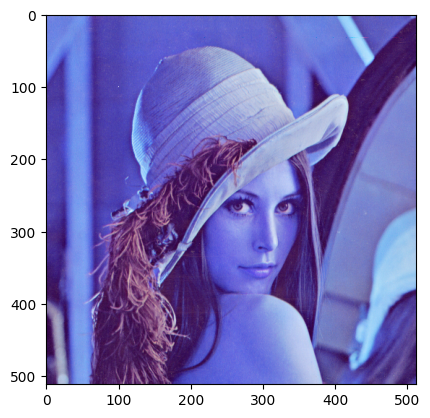

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)

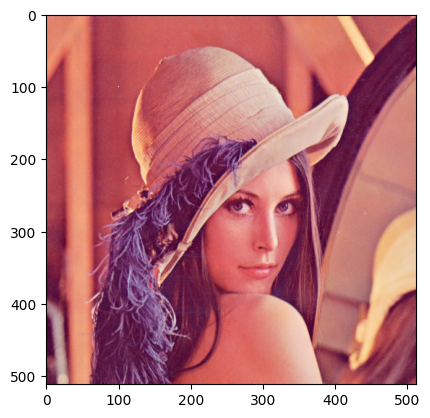

In [15]:
# convertir a rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


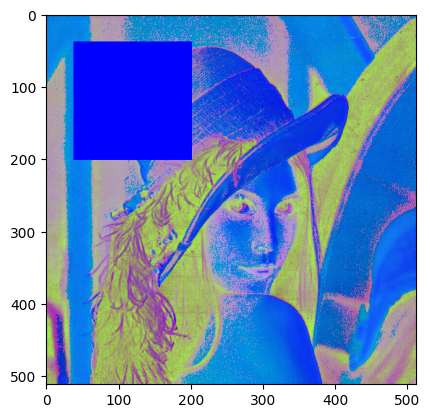

In [25]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# img[98:102, 98:102]*0+255
print(img[98:102, 98:102, 0])
print(img_hsv[98:102, 98:102, 1])
plt.imshow(img_hsv)

In [23]:
img[38:202, 38:202]=img[38:202, 38:202]*0+255

In [26]:
# usando una funcion

def display(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

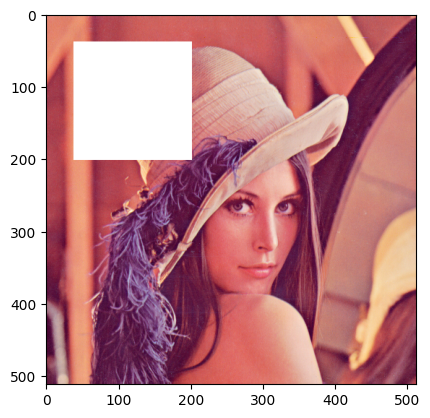

In [27]:
display(img)

## ROI
La Región de Interés o ROI (Region of Interest) puede ser definida usando el indexado de numpy.

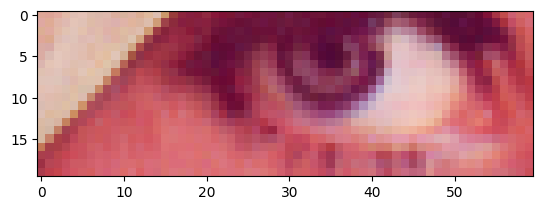

In [28]:
#           filas  , columnas
display(img[260:280, 230:290])

## Operaciones sobre imágenes


### Blending
Se suman dos imágenes con distintos niveles de ponderación de manera que se pueda obtener una transparencia, se opera de acuerdo a la siguiente fórmula:

$$g(x) = (1 - \alpha)f_0(x) + \alpha f_1(x)$$

(512, 512, 3) (512, 512, 3)


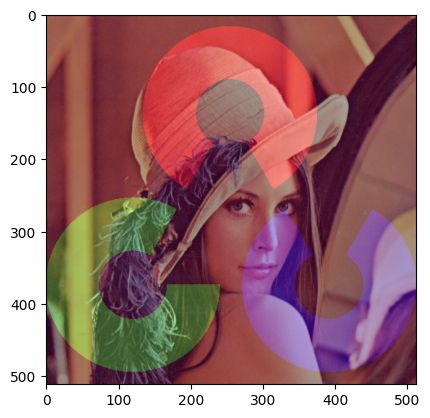

In [29]:
img1 = cv2.imread("lenna.png")
img2 = cv2.imread("opencv.png")
print(img1.shape, img2.shape)

display(cv2.addWeighted(img1, 0.7, img2, 0.3, 0))

### Cambio de espacios de color
Existen más de 150 operaciones para conversiones de espacios de color en OpenCV. Usaremos una vez más la función `cvtColor()` 

Para la conversión de BGR a HSV, es importante tomar en cuenta que los rangos para HSV son los siguientes:

  - hue: [0, 179]
  - saturation: [0, 255]
  - value: [0, 255]

In [30]:
img_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

print(img1[100, 100], img_hsv[100, 100])


[ 78  68 178] [177 158 178]


(512, 512, 3) (512, 512)


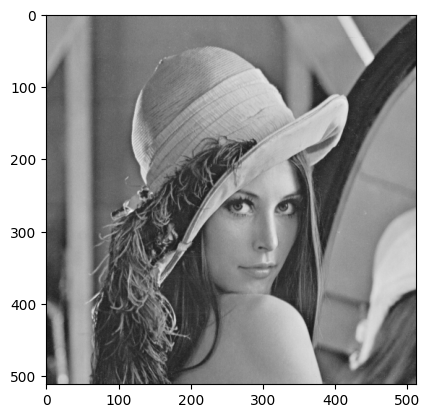

In [31]:
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
print(img1.shape, img_gray.shape)
display(img_gray)

### Escalado

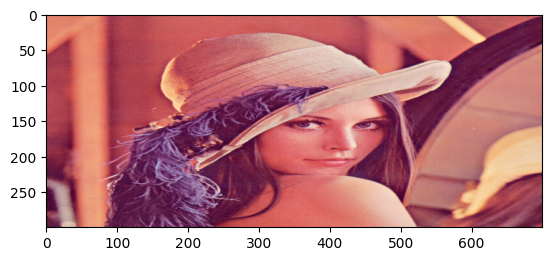

In [32]:
n_filas = 300
n_cols = 700
# dimensiones de salida de forma explicita
                        #     x    , y
img_long = cv2.resize(img1, (n_cols, n_filas), interpolation=cv2.INTER_CUBIC)
display(img_long)

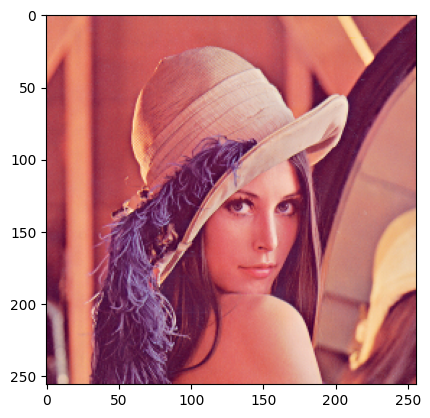

In [34]:
factor_filas = 0.5
factor_cols = 0.5

display(cv2.resize(img1, None, fy=factor_filas, fx=factor_cols, interpolation=cv2.INTER_CUBIC))

### Rotación
La rotación por un ángulo $\theta$ se puede lograr en base a la siguiente transformación:

$$ M = \begin{bmatrix}cos(\theta) & -sin(\theta)\\ sin(\theta) & cos(\theta)\end{bmatrix}$$

En OpenCV se puede usar la funcion `getRotationMatrix2D` para obtener una matriz de tranformación afín que represente la rotación deseada, y luego aplicar esta transformación a la imagen:

In [36]:
dimensiones = (400, 400, 3)
filas, columnas, _ = dimensiones
# columnas = dimensiones[1]
canales = dimensiones[2]

print(f"Dim: {dimensiones} -> filas: {filas}, cols: {columnas}, canales: {canales}")

Dim: (400, 400, 3) -> filas: 400, cols: 400, canales: 3


(512, 512, 3)
[[  0.81915204  -0.57357644 128.50361761]
 [  0.57357644   0.81915204 -66.8947492 ]]


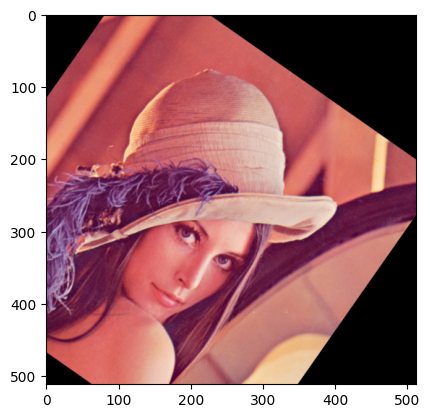

In [42]:
# obtener solamente el canal B
img3 = img1#[:,:,0]

filas, cols, _ = img3.shape
print(img3.shape)
theta = -35

# #                           (centro x      , centro y        , theta, escala)
M = cv2.getRotationMatrix2D(((cols - 1) / 3, (filas - 1) / 3), theta, 1)
print(M)
# #                     (img, matriz, size) 
display(cv2.warpAffine(img3, M, (cols, filas)))

## Ejercicio

Superponer la imagen de la flecha roja del archivo `flecha.png` con un tamaño de 100x100 pixeles sobre la imagen de `lenna.png` en la **esquina superior derecha** rotado en un ángulo de **135 grados*, como se puede observar en el ejemplo:

![result](output.png)